In [99]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [100]:
nycrime = pd.read_csv('./NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',thousands=',')

In [101]:
nycrime.columns

Index(['City', 'Population', 'Violentcrime', 'Murder', 'Raperevised',
       'Rapelegacy', 'Robbery', 'Aggravatedassault', 'Propertycrime',
       'Burglary', 'Larceny-theft', 'Motorvehicletheft', 'Arson3'],
      dtype='object')

In [102]:
nycrime.head()

,City,Population,Violentcrime,Murder,Raperevised,Rapelegacy,Robbery,Aggravatedassault,Propertycrime,Burglary,Larceny-theft,Motorvehicletheft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [104]:
nycrime_df = nycrime[['Propertycrime','Population','Murder','Robbery']]

In [105]:
nycrime_df.head()

,Propertycrime,Population,Murder,Robbery
0,12,1861,0,0
1,24,2577,0,0
2,16,2846,0,0
3,4090,97956,8,227
4,223,6388,0,4


In [106]:
nycrime_df.dtypes

Propertycrime    int64
Population       int64
Murder           int64
Robbery          int64
dtype: object

In [107]:
nycrime_df = nycrime_df.astype(float)

In [108]:
nycrime_df.dtypes

Propertycrime    float64
Population       float64
Murder           float64
Robbery          float64
dtype: object

In [109]:
nycrime_df['popsq'] = nycrime_df['Population']**2

In [110]:
nycrime_df['Robberies'] = np.where(nycrime_df['Robbery']>0,1,0)

In [111]:
nycrime_df['Murders'] = np.where(nycrime_df['Murder']>0,1,0)

In [112]:
nycrime_df.head()

,Propertycrime,Population,Murder,Robbery,popsq,Robberies,Murders
0,12.000,1861.000,0.000,0.000,3463321.000,0,0
1,24.000,2577.000,0.000,0.000,6640929.000,0,0
2,16.000,2846.000,0.000,0.000,8099716.000,0,0
3,4090.000,97956.000,8.000,227.000,9595377936.000,1,1
4,223.000,6388.000,0.000,4.000,40806544.000,1,0


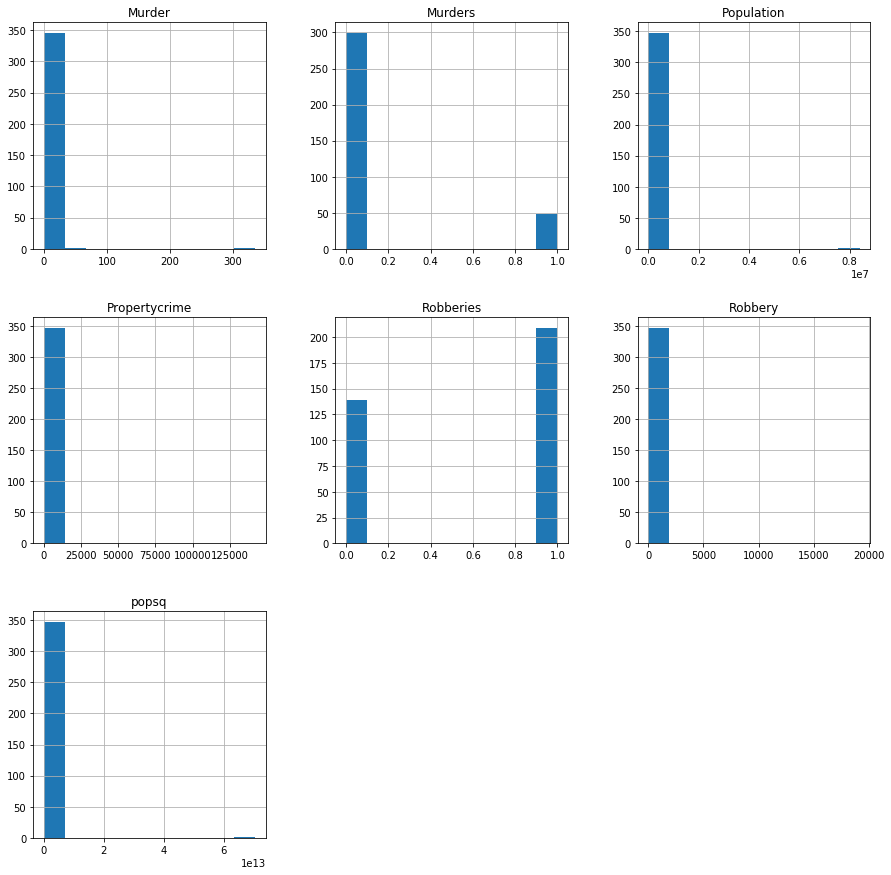

In [113]:
nycrime_df.hist(figsize=(15,15))
plt.show()

* There is a large outlier for population, murders and robberies

* This is New York City

In [116]:
nycrime_df['city'] = nycrime['City']


In [117]:
nycrime_df.loc[nycrime_df['city']=='New York']

,Propertycrime,Population,Murder,Robbery,popsq,Robberies,Murders,city
216,141971.000,8396126.000,335.000,19170.000,70494931807876.000,1,1,New York


* This is rather anomalous considering the other cities in the dataset.

* I choose to keep this datapoint because it is reality and not an error. 